In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set()
pd.set_option('display.max_columns', 100)

In [4]:
df = pd.read_csv('../data/processed/flights_weather.csv')
df.head()

,Year,Month,Day,DayOfWeek,FlightNumber,AirlineCode,TailNumber,OriginAirport,DestinationAirport,DepartureTime,ArrivalTime,AirTime,Distance,DepartureDelay,ArrivalDelay,Diverted,WeatherDelay,AirlineName,OriginAirportName,DestinationAirportName,FlightDate,Delayed,Date,Awnd,Prcp,Snow,Tmax,Tmin,AirportCode
0,2015,1,1,4,794,AS,N614AS,SEA,ABQ,1032.0,1427.0,154.0,1180,-8.0,-13.0,0,0.0,Alaska Airlines Inc.,Seattle-Tacoma International Airport,Albuquerque International Sunport,2015-01-01,False,2015-01-01,4.92,0.02,0.3,33.0,15.0,ABQ
1,2015,1,1,4,1024,AA,N505AA,DFW,ABQ,1408.0,1500.0,91.0,569,8.0,10.0,0,0.0,American Airlines Inc.,Dallas/Fort Worth International Airport,Albuquerque International Sunport,2015-01-01,False,2015-01-01,4.92,0.02,0.3,33.0,15.0,ABQ
2,2015,1,1,4,1203,AA,N4XPAA,DFW,ABQ,1853.0,1953.0,88.0,569,13.0,23.0,0,7.0,American Airlines Inc.,Dallas/Fort Worth International Airport,Albuquerque International Sunport,2015-01-01,True,2015-01-01,4.92,0.02,0.3,33.0,15.0,ABQ
3,2015,1,1,4,2388,AA,N486AA,DFW,ABQ,2126.0,2210.0,87.0,569,11.0,10.0,0,0.0,American Airlines Inc.,Dallas/Fort Worth International Airport,Albuquerque International Sunport,2015-01-01,False,2015-01-01,4.92,0.02,0.3,33.0,15.0,ABQ
4,2015,1,1,4,2115,DL,N959DL,MSP,ABQ,912.0,1124.0,141.0,981,-3.0,11.0,0,0.0,Delta Air Lines Inc.,Minneapolis-Saint Paul International Airport,Albuquerque International Sunport,2015-01-01,False,2015-01-01,4.92,0.02,0.3,33.0,15.0,ABQ


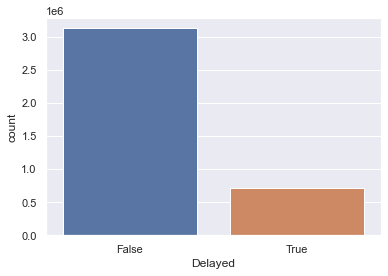

In [5]:
sns.countplot(x='Delayed', data=df)
plt.show()

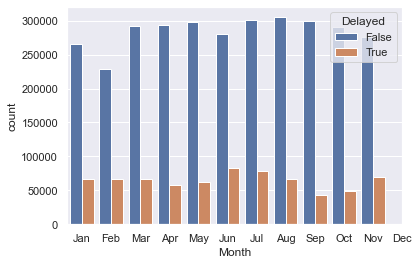

In [6]:
sns.countplot(x='Month', hue='Delayed', data=df)

plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

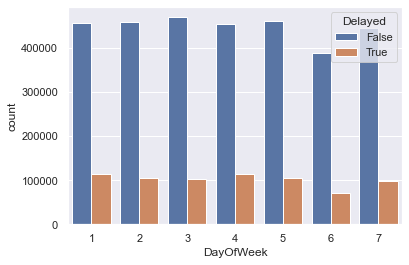

In [54]:
sns.countplot(x='DayOfWeek', hue='Delayed', data=df)
plt.show()

In [9]:
delayed_by_airline = df.groupby('AirlineName').agg({'Delayed': 'sum', 'AirlineName': 'count'})
delayed_by_airline['NotDelayed'] = delayed_by_airline['AirlineName'] - delayed_by_airline['Delayed']
delayed_by_airline.columns = ['Delayed', 'Total', 'NotDelayed']
delayed_by_airline['DelayedPercent'] = delayed_by_airline['Delayed'] / delayed_by_airline['Total']

delayed_by_airline

,Delayed,Total,NotDelayed,DelayedPercent
AirlineName,,,,
Alaska Airlines Inc.,14097,114489,100392,0.123130
American Airlines Inc.,96547,528026,431479,0.182845
American Eagle Airlines Inc.,36169,164176,128007,0.220306
Atlantic Southeast Airlines,50297,253592,203295,0.198338
Delta Air Lines Inc.,90665,663263,572598,0.136695
Frontier Airlines Inc.,18301,68667,50366,0.266518
Hawaiian Airlines Inc.,5602,48897,43295,0.114567
JetBlue Airways,37954,169022,131068,0.224551
Skywest Airlines Inc.,62909,339143,276234,0.185494


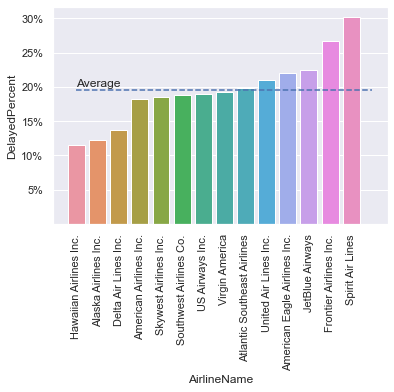

In [10]:
sns.barplot(x=delayed_by_airline.index, y='DelayedPercent', data=delayed_by_airline, order=delayed_by_airline.sort_values('DelayedPercent').index)

plt.hlines(delayed_by_airline.DelayedPercent.mean(), 0, 14, linestyles='dashed')
# add average text
plt.text(0, delayed_by_airline.DelayedPercent.mean() + .005, 'Average', fontsize=12)

plt.xticks(rotation=90)
plt.yticks([.05, .1, .15, .2, .25, .3], ['5%', '10%', '15%', '20%', '25%', '30%'])

plt.show()

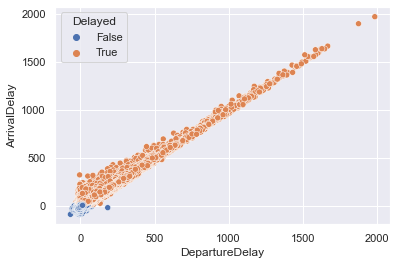

In [14]:
sns.scatterplot(x='DepartureDelay', y='ArrivalDelay', hue='Delayed', data=df)
plt.show()

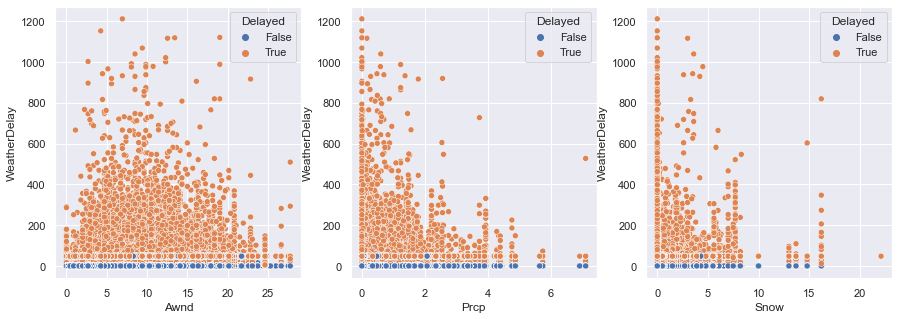

In [22]:
# Awnd	Prcp	Snow
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.scatterplot(x='Awnd', y='WeatherDelay', hue='Delayed', data=df, ax=ax[0])
sns.scatterplot(x='Prcp', y='WeatherDelay', hue='Delayed', data=df, ax=ax[1])
sns.scatterplot(x='Snow', y='WeatherDelay', hue='Delayed', data=df, ax=ax[2])

plt.show()

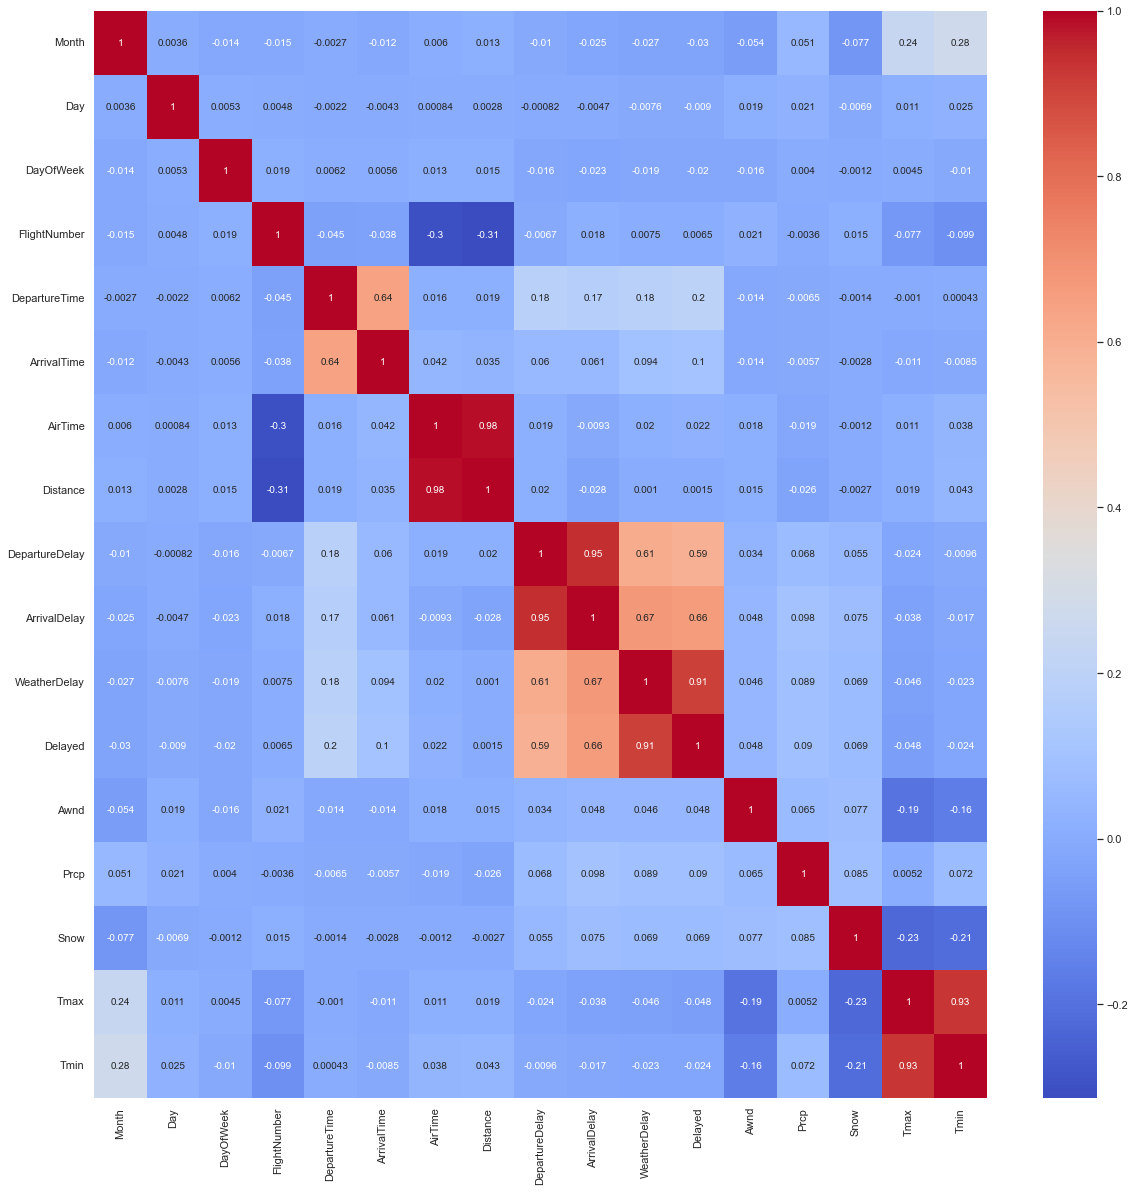

In [27]:
fig = plt.figure(figsize=(20, 20))

sns.heatmap(df.drop(['Diverted', 'Year'], axis=1).corr(), annot=True, cmap='coolwarm')

plt.show()